In [2]:
import os
import sys
sys.path.append("./../")
import numpy as np
import matplotlib.pyplot as plt
import pdb
import pandas as pd
import yaml
import h5py
import vicon_imu_data_process.process_landing_data as pro_rd
#import assessments.scores as es_as

import seaborn as sns
import copy
import re
import json

from vicon_imu_data_process.const import FEATURES_FIELDS, LABELS_FIELDS, DATA_PATH
from vicon_imu_data_process.const import DROPLANDING_PERIOD, RESULTS_PATH
from vicon_imu_data_process import const
from vicon_imu_data_process.dataset import *

from models.rnn_models import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
import time as localtimepkg

#from estimation_study import *
from assessments.visualization import *
#import pdb
import re

## Baseline

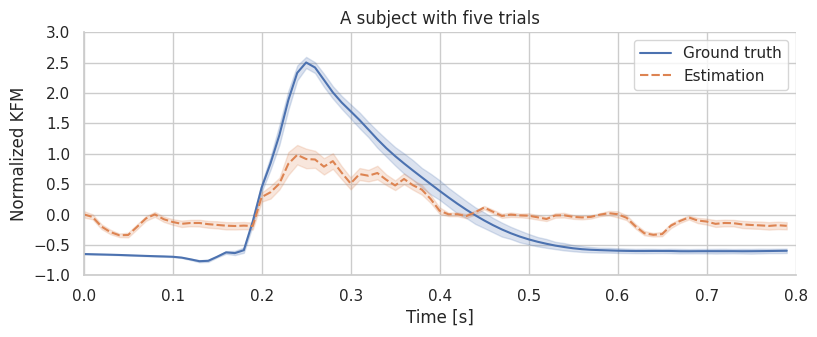

/media/suntao/DATA/drop_landing_workspace/results/training_testing/baseline_t1_5/25trials/15sub/data_visulization/2023-02-12/14_15_53_curves..svg


In [15]:
# Plot estimation curves


combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","baseline_t1_5",str(trial_idx)+"trials",str(sub_idx)+"sub","testing_result_folders.txt") for sub_idx in [15] for trial_idx in [25]
                                    ]

config = {
  'xticks':[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
  'yticks':[-1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0],
    'ylim':[-1.0, 3.0],
  'figsize': (8,3),
  'ylabels': 5*['Normalized KFM'],
   'titles': ['A subject with five trials', '14 subjects with 25 trials'],
  'font_scale':1.0, 
   'save_fig': True,
    #'fig_path': "/home/sun/workspace/working_paper/P6_workspace/Figures/Fig_results_baseline_curves.svg",
    'save_format': '.svg'
}

figpath, multi_model_results = p6plot_statistic_actual_estimation_curves(combination_investigation_results, col_wrap=1, **config)

/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v3/5trials/1sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v3/10trials/1sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v3/15trials/1sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v3/20trials/1sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v3/25trials/1sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v3/5trials/2sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v3/10trials/2sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing

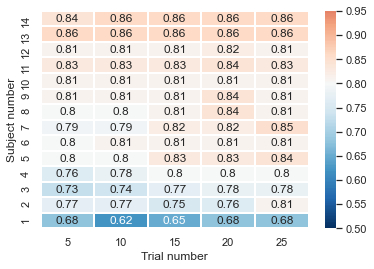

'/home/sun/workspace/working_paper/P6_workspace/Figures/Fig_results_baseline_heatmap.svg'

In [5]:
# plot heatmap

combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing", "investigation_baseline_v3",
                 str(trial_idx)+"trials", str(sub_idx)+"sub",
                 "testing_result_folders.txt") for sub_idx in range(1,15,1) for trial_idx in range(5, 26 ,5)
]

#metrics = get_list_investigation_metrics(combination_investigation_results)

combination_investigation_metrics = [os.path.join(os.path.dirname(folder), "metrics.csv") for folder in combination_investigation_results]
filters={'drop_value':0.0,'sort_variable':'r2'}

baseline_metrics = parase_list_investigation_metrics(combination_investigation_metrics,calculate_mean_subject_r2=True,**filters)
data = baseline_metrics[['trial_num','subject_num','r2']].groupby(['subject_num','trial_num']).mean().round(2).reset_index().pivot('subject_num','trial_num')['r2']
#data = baseline_metrics[['trial_num','subject_num','mean_subject_r2']].groupby(['subject_num','trial_num']).median().round(2).reset_index().pivot('subject_num','trial_num')['mean_subject_r2']
ax = sns.heatmap(data, vmin=0.5, vmax=0.95,cmap="RdBu_r",center=0.8,annot=True,linewidths=0.3).invert_yaxis()
plt.ylabel('Subject number')
plt.xlabel('Trial number')
save_format='svg'
fig_path="/home/sun/workspace/working_paper/P6_workspace/Figures/Fig_results_baseline_heatmap.svg"
save_figure('',fig_path=fig_path,fig_format=save_format)
#save_figure(os.path.dirname(combination_investigation_metrics[0]),fig_format=save_format)


In [20]:
baseline_metrics[(baseline_metrics['subject_num']>12)&(baseline_metrics['trial_num']==5)][['subject_num','trial_num','test_subject','r2','mean_subject_r2']].groupby(['subject_num','trial_num']).median()

KeyError: "['mean_subject_r2'] not in index"

In [16]:
# table

filters={'drop_value':0.0,'sort_variable':'r2'}
baseline_metrics = parase_list_investigation_metrics(combination_investigation_metrics,**filters)
baseline_metrics[['trial_num','subject_num','r2']][aug_metrics['trial_num'].isin([25])].groupby(['subject_num','trial_num']).describe().round(2)['r2'][['min','50%', '75%','max']].T

NameError: name 'combination_investigation_metrics' is not defined

In [14]:
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]
filters={'drop_value':0.0,'sort_variable':'r2'}
baseline_metrics = parase_list_investigation_metrics(combination_investigation_metrics,**filters)
baseline_metrics['subject_num'].replace({idx:idx-4 for idx in range(5,11)},inplace=True)

baseline_metrics[['trial_num','subject_num','r2']][baseline_metrics['trial_num'].isin([25])].groupby(['subject_num','trial_num']).describe().round(2)['r2'][['min','50%', '75%','max']].T
#baseline_metrics[['trial_num','subject_num','r2']].groupby(['subject_num','trial_num']).describe().round(2)['r2'][['min','50%', '75%','max']].T

/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v3/10trials/11sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v3/10trials/12sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v3/10trials/13sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v3/10trials/14sub/metrics.csv
DROP R2 cases below :0.0


KeyError: 'r2'

## Augment

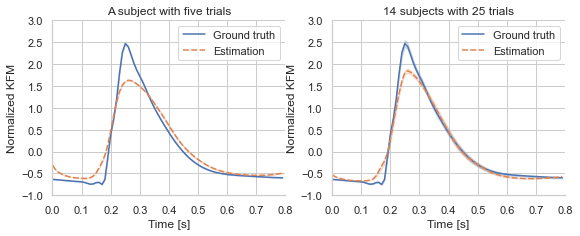

/home/sun/workspace/working_paper/P6_workspace/Figures/Fig_results_augment_curves.svg


In [3]:
# Plot estimation results of augmentation

combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_imu_augment_v3",str(trial_idx)+"trials",str(sub_idx)+"sub","testing_result_folders.txt") for sub_idx in [1] for trial_idx in [5]
                                    ] +[
    os.path.join(RESULTS_PATH, "training_testing","investigation_imu_augment_v3",str(trial_idx)+"trials",str(sub_idx)+"sub","testing_result_folders.txt") for sub_idx in [14] for trial_idx in [25]
                                ]

config = {
  'xticks':[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
  'yticks':[-1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0],
    'ylim':[-1.0, 3.0],
  'figsize': (8,3),
  'ylabels': 5*['Normalized KFM'],
   'titles': ['A subject with five trials', '14 subjects with 25 trials'],
  'font_scale':1.0, 
   'save_fig': True,
  'fig_path': "/home/sun/workspace/working_paper/P6_workspace/Figures/Fig_results_augment_curves.svg",
    'save_format': 'svg'
}

figpath, multi_model_results = p6plot_statistic_actual_estimation_curves(combination_investigation_results, col_wrap=2, **config)

/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v4/10trials/1sub/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v4/15trials/1sub/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v4/20trials/1sub/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v4/25trials/1sub/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v4/10trials/2sub/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v4/15trials/2sub/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v4/20trials/2sub/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v4/25trials/2sub/tes

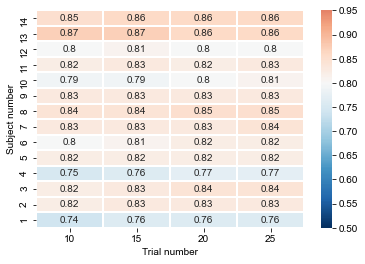

'/home/sun/workspace/working_paper/P6_workspace/Figures/Fig_results_augmentation_heatmap.svg'

In [3]:
# imu augmentation
combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_imu_augment_v4",str(trial_idx)+"trials",str(sub_idx)+"sub",
                 "testing_result_folders.txt") for sub_idx in range(1,15,1) for trial_idx in range(10,26,5)
]

metrics = get_list_investigation_metrics(combination_investigation_results)

combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]
filters={'drop_value':0.0,'sort_variable':'r2'}
#filters={}

aug_metrics = parase_list_investigation_metrics(combination_investigation_metrics,**filters)
#aug_metrics['subject_num'].replace({idx:idx-4 for idx in range(5,11)},inplace=True)

data = aug_metrics[['trial_num','subject_num','r2']].groupby(['subject_num','trial_num']).mean().round(2).reset_index().pivot('subject_num','trial_num')['r2']
ax = sns.heatmap(data, vmin=0.5, vmax=0.95,cmap="RdBu_r",center=0.8,annot=True,linewidths=0.3).invert_yaxis()
plt.ylabel('Subject number')
plt.xlabel('Trial number')
save_format='svg'
fig_path="/home/sun/workspace/working_paper/P6_workspace/Figures/Fig_results_augmentation_heatmap.svg"
save_figure('',fig_path=fig_path,fig_format=save_format)
#save_figure(os.path.dirname(combination_investigation_metrics[0]),fig_format=save_format)

In [22]:

combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_imu_augment_v2",str(trial_idx)+"trials",str(sub_idx)+"sub","testing_result_folders.txt") for sub_idx in range(1,15,1) for trial_idx in range(5,6,5)
]

#metrics = get_list_investigation_metrics(combination_investigation_results)

combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]
filters={'drop_value':0.0,'sort_variable':'r2'}
#filters={}

aug_metrics = parase_list_investigation_metrics(combination_investigation_metrics,**filters)

/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v2/5trials/1sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v2/5trials/2sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v2/5trials/3sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v2/5trials/4sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v2/5trials/5sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v2/5trials/6sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v2/5trials/7sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/

In [27]:
aug_metrics[['test_subject','child_test_id','r2','subject_num']].groupby(['test_subject', 'subject_num']).mean().round(2).to_csv('ss.csv')

In [24]:
aug_metrics.head()

,Unnamed: 0,model_selection,alias_name,subject_num,trial_num,labels_name,r2,r_rmse,test_subject,parent_test_id,child_test_id,Test ID,Metrics ID,subjects,trials,execution_time,additional_imus
838,838,imu_augment,1sub_5trials_imu_augment_v1,1,5,R_KNEE_MOMENT_X,0.010,0.267,P_18_hezhonghai,test_153328,test_43,test_153328,test_153328_43,P_08_zhangboyuan,0,-100,NaN
359,359,imu_augment,1sub_5trials_imu_augment_v1,1,5,R_KNEE_MOMENT_X,0.013,0.279,P_15_liuzhaoyu,test_152828,test_21,test_152828,test_152828_21,P_10_dongxuan,0,-100,NaN
160,160,imu_augment,1sub_5trials_imu_augment_v1,1,5,R_KNEE_MOMENT_X,0.023,0.278,P_19_xiongyihui,test_153242,test_46,test_153242,test_153242_46,P_08_zhangboyuan,0,-100,NaN
983,983,imu_augment,1sub_5trials_imu_augment_v1,1,5,R_KNEE_MOMENT_X,0.030,0.286,P_23_wangjinhong,test_152944,test_63,test_152944,test_152944_63,P_08_zhangboyuan,0,-100,NaN
560,560,imu_augment,1sub_5trials_imu_augment_v1,1,5,R_KNEE_MOMENT_X,0.036,0.258,P_13_xulibang,test_153124,test_16,test_153124,test_153124_16,P_08_zhangboyuan,0,-100,NaN


In [23]:
# table

filters={'drop_value':0.0,'sort_variable':'r2'}
aug_metrics = parase_list_investigation_metrics(combination_investigation_metrics,**filters)
aug_metrics[['trial_num','subject_num','r2']][aug_metrics['trial_num'].isin([25])].groupby(['subject_num','trial_num']).describe().round(2)['r2'][['min','50%', '75%','max']].T

/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v2/5trials/1sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v2/5trials/2sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v2/5trials/3sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v2/5trials/4sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v2/5trials/5sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v2/5trials/6sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v2/5trials/7sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/

KeyError: 'r2'

## Comparsion

{'baseline': 'Original dataset', 'finetuning': 'Fine-tuning', 'imu_augment': 'Augmented dataset', 'Normal_DANN': 'DANN', 'DANN': 'TDANN', 'Aug_DANN': 'ADANN'}
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v3/5trials/1sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v3/10trials/1sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v3/15trials/1sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v3/20trials/1sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v3/25trials/1sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v3/5trials/2sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/

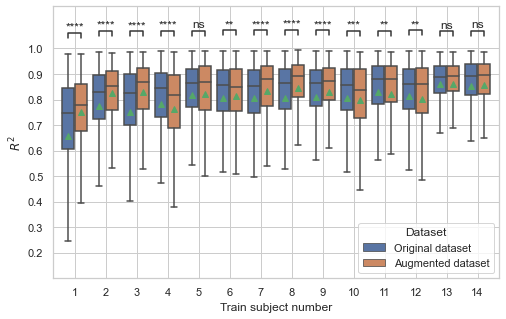

/home/sun/workspace/working_paper/P6_workspace/Figures/Fig_results_comparison.svg


'/home/sun/workspace/working_paper/P6_workspace/Figures/Fig_results_comparison.svg'

In [4]:
# compare baseline and imu augmentation
combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_baseline_v3",
                 str(trial_idx)+"trials",str(sub_idx)+"sub",
                 "testing_result_folders.txt") for sub_idx in range(1,15,1) for trial_idx in range(5,26,5)
                                    ]+ [
    os.path.join(RESULTS_PATH, "training_testing","investigation_imu_augment_v4",
                 str(trial_idx)+"trials",str(sub_idx)+"sub",
                 "testing_result_folders.txt") for sub_idx in range(1,15,1) for trial_idx in range(5,26,5)
                                    ]

#metrics = get_list_investigation_metrics(combination_investigation_results)
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]

#subs = list(set(metrics['alias_name']))
#replace_values = {sub: int(sub.split('v')[1])-1 for sub in subs}
replace_values = {}
replace_values.update({'baseline': 'Baseline', 'finetuning': 'Fine-tuning', 'imu_augment': 'IMU augmentation', 'Normal_DANN': 'DANN', 'DANN': 'TDANN', 'Aug_DANN': 'ADANN'})
replace_values.update({'baseline': 'Original dataset', 'finetuning': 'Fine-tuning', 'imu_augment': 'Augmented dataset', 'Normal_DANN': 'DANN', 'DANN': 'TDANN', 'Aug_DANN': 'ADANN'})
print(replace_values)
replace_columns = {'subject_num': 'Train subject number', 'trial_num': 'Trial number', 'model_selection':'Dataset'}
test_pairs =(
            [(1,'Original dataset'), (1,'Augmented dataset')],
            [(2,'Original dataset'), (2,'Augmented dataset')],
            [(3,'Original dataset'), (3,'Augmented dataset')],
            [(4,'Original dataset'), (4,'Augmented dataset')],
            [(5,'Original dataset'), (5,'Augmented dataset')],
            [(6,'Original dataset'), (6,'Augmented dataset')],
            [(7,'Original dataset'), (7,'Augmented dataset')],
            [(8,'Original dataset'), (8,'Augmented dataset')],
            [(9,'Original dataset'), (9,'Augmented dataset')],
            [(10,'Original dataset'), (10,'Augmented dataset')],
            [(11,'Original dataset'), (11,'Augmented dataset')],
            [(12,'Original dataset'), (12,'Augmented dataset')],
            [(13,'Original dataset'), (13,'Augmented dataset')],
            [(14,'Original dataset'), (14,'Augmented dataset')],
            )


plot_config={
        "save_fig": True, "save_format":"jpg", "save_folder_index": 0,
         'figsize':(8, 5),
         "hue": 'Dataset',
        'replace_values': replace_values,
        'replace_columns': replace_columns,
        'x': 'Train subject number',
        #'y': 'mean_subject_r2',
        'y': 'r2',
        'title': 'baseline',
        'yticks': (0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0),
        #'plot_title': 'baseline',
    'filters': {'drop_value':0.0,'sort_variable':'r2'},
    'font_scale': 1.0,
    'plot_type': 'boxplot',
    'ttest':True,
    'fig_path': "/home/sun/workspace/working_paper/P6_workspace/Figures/Fig_results_comparison.svg",
    'test_pairs':test_pairs
    }

filters={'drop_value':0.0,'sort_variable':'r2'}
p6plot_model_accuracy(combination_investigation_metrics, **plot_config)

Fig. Estimation accuracy ($R^2$) of the knee extension moment (KEM) under the different dataset type (measured raw dataset and its augmented dataset) and size (subject and trial numbers). 